<a href="https://colab.research.google.com/github/sandeepbansode/Machine_Learning_Data_Science/blob/main/ML_10_Logistic_Regression_Implementation_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**
This dataset contains about 10 years of daily weather observations from numerous Australian weather stations.

The target RainTomorrow means: Did it rain the next day? Yes or No.

Note: You should exclude the variable Risk-MM when training your binary classification model. If you don't exclude it, you will leak the answers to your model and reduce its predictability.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

In [17]:
# Reading the file
df = pd.read_csv("/content/drive/MyDrive/Data Science Files/weatherAUS.csv")

# Exploratory data analysis 

In [18]:
# view dimensions of dataset
# We can see that there are 142193 instances and 24 variables in the data set.
df.shape

(145460, 23)

In [19]:
#preview Dataset
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [20]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [21]:
#smmary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [22]:
#checking null values in dataset
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [23]:
#Feature Engineering of Date Variable
df['Date'].dtypes

# parse the dates, currently coded as strings, into datetime format

df['Date'] = pd.to_datetime(df['Date'])

In [24]:
# extract year from date

df['Year'] = df['Date'].dt.year

print(df['Year'].head(),'\n\n')

# extract month from date

df['Month'] = df['Date'].dt.month

print(df['Month'].head(),'\n\n')

# extract day from date

df['Day'] = df['Date'].dt.day

print(df['Day'].head(),'\n\n')

# again view the summary of dataset

df.info()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64 


0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64 


0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int64 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11 

In [25]:
# drop the original Date variable

df.drop('Date', axis=1, inplace = True)

df.head(5)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


#Dropping the null values in dependent variable

In [26]:
#Dropping the null values in dependent variable
df1 = df[df['RainTomorrow'].notna()]

In [27]:
df1

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,...,1021.2,NaN,NaN,9.4,20.9,No,No,2017,6,20
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,1020.3,NaN,NaN,10.1,22.4,No,No,2017,6,21
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,1019.1,NaN,NaN,10.9,24.5,No,No,2017,6,22
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,1016.8,NaN,NaN,12.5,26.1,No,No,2017,6,23


In [28]:
#preview data
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    81350 non-null   float64
 5   Sunshine       74377 non-null   float64
 6   WindGustDir    132863 non-null  object 
 7   WindGustSpeed  132923 non-null  float64
 8   WindDir9am     132180 non-null  object 
 9   WindDir3pm     138415 non-null  object 
 10  WindSpeed9am   140845 non-null  float64
 11  WindSpeed3pm   139563 non-null  float64
 12  Humidity9am    140419 non-null  float64
 13  Humidity3pm    138583 non-null  float64
 14  Pressure9am    128179 non-null  float64
 15  Pressure3pm    128212 non-null  float64
 16  Cloud9am       88536 non-null   float64
 17  Cloud3pm       85099 non-null

as we see in our data, there are 7 variables are categorical variables

In [29]:
# find categorical variables

categorical = [var for var in df1.columns if df1[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 6 categorical variables

The categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [30]:
# view the categorical variables

df1[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No


In [31]:
# find numerical variables

numerical = [var for var in df1.columns if df1[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 19 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [32]:
# view the numerical variables

df1[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5


In [33]:
#checking null values in dataframe
df1.isna().sum()

Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
Year                 0
Month                0
Day                  0
dtype: int64

# **Filling the null values**

In [34]:
#filling the null values in numerical variable with median
df1 = df1.fillna(df1.median())

In [35]:
df1.isna().sum()

Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir       9330
WindGustSpeed        0
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         1406
RainTomorrow         0
Year                 0
Month                0
Day                  0
dtype: int64

In [36]:
#replacing null values in categorical variables with mode value
df1['WindGustDir'].fillna(df1['WindGustDir'].mode()[0], inplace=True)
df1['WindDir9am'].fillna(df1['WindDir9am'].mode()[0], inplace=True)
df1['WindDir3pm'].fillna(df1['WindDir3pm'].mode()[0], inplace=True)
df1['RainToday'].fillna(df1['RainToday'].mode()[0], inplace=True)
df1['RainTomorrow'].fillna(df1['RainTomorrow'].mode()[0], inplace=True)

In [37]:
df1.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

#**Lablel Encoding**
Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

In [38]:
# view the categorical variables

df1[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No


In [39]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Location'.'RainTomorrow','Date','WindDir9am',	'WindDir3pm',	'RainToday',	'RainTomorrow'
df1['Location']= label_encoder.fit_transform(df1['Location'])
df1['WindGustDir']= label_encoder.fit_transform(df1['WindGustDir'])
df1['WindDir9am']= label_encoder.fit_transform(df1['WindDir9am'])
df1['WindDir3pm']= label_encoder.fit_transform(df1['WindDir3pm'])
df1['RainToday']= label_encoder.fit_transform(df1['RainToday'])
df1['RainTomorrow']= label_encoder.fit_transform(df1['RainTomorrow'])

In [40]:
#preview the data after label encoding 
df1

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2,13.4,22.9,0.6,4.8,8.5,13,44.0,13,14,...,1007.1,8.0,5.0,16.9,21.8,0,0,2008,12,1
1,2,7.4,25.1,0.0,4.8,8.5,14,44.0,6,15,...,1007.8,5.0,5.0,17.2,24.3,0,0,2008,12,2
2,2,12.9,25.7,0.0,4.8,8.5,15,46.0,13,15,...,1008.7,5.0,2.0,21.0,23.2,0,0,2008,12,3
3,2,9.2,28.0,0.0,4.8,8.5,4,24.0,9,0,...,1012.8,5.0,5.0,18.1,26.5,0,0,2008,12,4
4,2,17.5,32.3,1.0,4.8,8.5,13,41.0,1,7,...,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,41,3.5,21.8,0.0,4.8,8.5,0,31.0,2,0,...,1021.2,5.0,5.0,9.4,20.9,0,0,2017,6,20
145455,41,2.8,23.4,0.0,4.8,8.5,0,31.0,9,1,...,1020.3,5.0,5.0,10.1,22.4,0,0,2017,6,21
145456,41,3.6,25.3,0.0,4.8,8.5,6,22.0,9,3,...,1019.1,5.0,5.0,10.9,24.5,0,0,2017,6,22
145457,41,5.4,26.9,0.0,4.8,8.5,3,37.0,9,14,...,1016.8,5.0,5.0,12.5,26.1,0,0,2017,6,23


In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  int64  
 1   MinTemp        142193 non-null  float64
 2   MaxTemp        142193 non-null  float64
 3   Rainfall       142193 non-null  float64
 4   Evaporation    142193 non-null  float64
 5   Sunshine       142193 non-null  float64
 6   WindGustDir    142193 non-null  int64  
 7   WindGustSpeed  142193 non-null  float64
 8   WindDir9am     142193 non-null  int64  
 9   WindDir3pm     142193 non-null  int64  
 10  WindSpeed9am   142193 non-null  float64
 11  WindSpeed3pm   142193 non-null  float64
 12  Humidity9am    142193 non-null  float64
 13  Humidity3pm    142193 non-null  float64
 14  Pressure9am    142193 non-null  float64
 15  Pressure3pm    142193 non-null  float64
 16  Cloud9am       142193 non-null  float64
 17  Cloud3pm       142193 non-nul

as we can see their all categorical variables converted into numerical after Label encoding

In [42]:
#here we can there is no null record in our data
df1.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

# **Model Building**

## Declare feature vector and target variable

In [43]:
X = df1.drop(['RainTomorrow'], axis=1)

y = df1['RainTomorrow']


# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# check the shape of X_train and X_test
print(X_train.shape, X_test.shape)

(113754, 24) (28439, 24)


In [44]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

# **Predict results**

In [45]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([0, 0, 0, ..., 0, 0, 1])

# **Check accuracy score**

In [46]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8444


In [47]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[20874  1193]
 [ 3232  3140]]

True Positives(TP) =  20874

True Negatives(TN) =  3140

False Positives(FP) =  1193

False Negatives(FN) =  3232


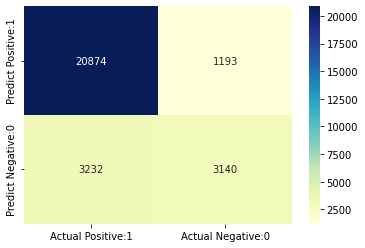

In [48]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.87      0.95      0.90     22067
           1       0.72      0.49      0.59      6372

    accuracy                           0.84     28439
   macro avg       0.80      0.72      0.75     28439
weighted avg       0.83      0.84      0.83     28439



# Adjusting the threshold level

In [50]:

# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = logreg.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.88620387, 0.11379613],
       [0.8909896 , 0.1090104 ],
       [0.8460829 , 0.1539171 ],
       [0.9897594 , 0.0102406 ],
       [0.95327054, 0.04672946],
       [0.96485024, 0.03514976],
       [0.20790001, 0.79209999],
       [0.21220004, 0.78779996],
       [0.86271451, 0.13728549],
       [0.88871074, 0.11128926]])

### Observations
In each row, the numbers sum to 1.

* There are 2 columns which correspond to 2 classes - 0 and 1.

Class 0 - predicted probability that there is no rain tomorrow.

Class 1 - predicted probability that there is rain tomorrow.

* Importance of predicted probabilities

We can rank the observations by probability of rain or no rain.

* predict_proba process

Predicts the probabilities

Choose the class with the highest probability

* Classification threshold level: 

There is a classification threshold level of 0.5.

Class 1 - probability of rain is predicted if probability > 0.5.

Class 0 - probability of no rain is predicted if probability < 0.5.


In [52]:
# store the probabilities in dataframe

y_pred_prob_df1 = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No rain tomorrow (0)', 'Prob of - Rain tomorrow (1)'])

y_pred_prob_df1

,Prob of - No rain tomorrow (0),Prob of - Rain tomorrow (1)
0,0.886204,0.113796
1,0.890990,0.109010
2,0.846083,0.153917
3,0.989759,0.010241
4,0.953271,0.046729
5,0.964850,0.035150
6,0.207900,0.792100
7,0.212200,0.787800
8,0.862715,0.137285
9,0.888711,0.111289


#**Now Creating new dataset DF2**

In [62]:
df2=df[df['RainTomorrow'].isna()]

In [63]:
df2

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
14,Albury,8.4,24.6,0.0,NaN,NaN,NaN,NaN,S,WNW,...,1008.7,NaN,NaN,15.9,23.5,No,NaN,2008,12,15
283,Albury,2.6,NaN,0.0,NaN,NaN,NaN,NaN,E,WNW,...,1017.6,NaN,6.0,9.7,14.3,No,NaN,2009,9,10
435,Albury,22.1,35.1,0.0,NaN,NaN,NaN,NaN,ENE,SW,...,1017.8,NaN,1.0,26.9,33.5,No,NaN,2010,2,9
437,Albury,21.5,35.0,0.0,NaN,NaN,NaN,NaN,SSE,E,...,1010.3,NaN,8.0,24.2,33.1,No,NaN,2010,2,11
443,Albury,15.5,30.6,0.0,NaN,NaN,NaN,NaN,SE,SSW,...,1013.8,NaN,NaN,19.4,30.0,No,NaN,2010,2,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144955,Uluru,22.5,37.7,0.0,NaN,NaN,SE,50.0,SE,ESE,...,1009.6,NaN,NaN,28.8,37.2,No,NaN,2016,2,7
145091,Uluru,12.3,19.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1014.1,8.0,8.0,15.6,18.9,No,NaN,2016,6,22
145092,Uluru,14.2,18.7,NaN,NaN,NaN,NaN,NaN,W,NaN,...,1014.6,8.0,8.0,16.6,17.5,NaN,NaN,2016,6,23
145335,Uluru,13.5,NaN,0.0,NaN,NaN,NaN,NaN,ENE,SW,...,1008.4,NaN,NaN,25.2,34.4,No,NaN,2017,2,21


In [64]:
df2.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
14,Albury,8.4,24.6,0.0,NaN,NaN,NaN,NaN,S,WNW,...,1008.7,NaN,NaN,15.9,23.5,No,NaN,2008,12,15
283,Albury,2.6,NaN,0.0,NaN,NaN,NaN,NaN,E,WNW,...,1017.6,NaN,6.0,9.7,14.3,No,NaN,2009,9,10
435,Albury,22.1,35.1,0.0,NaN,NaN,NaN,NaN,ENE,SW,...,1017.8,NaN,1.0,26.9,33.5,No,NaN,2010,2,9
437,Albury,21.5,35.0,0.0,NaN,NaN,NaN,NaN,SSE,E,...,1010.3,NaN,8.0,24.2,33.1,No,NaN,2010,2,11
443,Albury,15.5,30.6,0.0,NaN,NaN,NaN,NaN,SE,SSW,...,1013.8,NaN,NaN,19.4,30.0,No,NaN,2010,2,17


In [65]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3267 entries, 14 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       3267 non-null   object 
 1   MinTemp        2419 non-null   float64
 2   MaxTemp        2328 non-null   float64
 3   Rainfall       1412 non-null   float64
 4   Evaporation    1320 non-null   float64
 5   Sunshine       1248 non-null   float64
 6   WindGustDir    2271 non-null   object 
 7   WindGustSpeed  2274 non-null   float64
 8   WindDir9am     2714 non-null   object 
 9   WindDir3pm     2817 non-null   object 
 10  WindSpeed9am   2848 non-null   float64
 11  WindSpeed3pm   2835 non-null   float64
 12  Humidity9am    2387 non-null   float64
 13  Humidity3pm    2370 non-null   float64
 14  Pressure9am    2216 non-null   float64
 15  Pressure3pm    2220 non-null   float64
 16  Cloud9am       1036 non-null   float64
 17  Cloud3pm       1003 non-null   float64
 18  Temp9

In [66]:
df2.isna().sum()

Location            0
MinTemp           848
MaxTemp           939
Rainfall         1855
Evaporation      1947
Sunshine         2019
WindGustDir       996
WindGustSpeed     993
WindDir9am        553
WindDir3pm        450
WindSpeed9am      419
WindSpeed3pm      432
Humidity9am       880
Humidity3pm       897
Pressure9am      1051
Pressure3pm      1047
Cloud9am         2231
Cloud3pm         2264
Temp9am           863
Temp3pm           883
RainToday        1855
RainTomorrow     3267
Year                0
Month               0
Day                 0
dtype: int64

In [67]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Location'.'RainTomorrow','Date','WindDir9am',	'WindDir3pm',	'RainToday',	'RainTomorrow'
df2['Location']= label_encoder.fit_transform(df2['Location'])
df2['WindGustDir']= label_encoder.fit_transform(df2['WindGustDir'])
df2['WindDir9am']= label_encoder.fit_transform(df2['WindDir9am'])
df2['WindDir3pm']= label_encoder.fit_transform(df2['WindDir3pm'])
df2['RainToday']= label_encoder.fit_transform(df2['RainToday'])
df2['RainTomorrow']= label_encoder.fit_transform(df2['RainTomorrow'])

#now split the data in x and y

In [68]:
from sklearn.utils.validation import indexable
X = df2.drop(['RainTomorrow'], axis=1)

y = df2['RainTomorrow']

print(X.shape)
print(y.shape)


(3267, 24)
(3267,)


In [69]:
X

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
14,2,8.4,24.6,0.0,NaN,NaN,16,NaN,8,14,...,1009.7,1008.7,NaN,NaN,15.9,23.5,0,2008,12,15
283,2,2.6,NaN,0.0,NaN,NaN,16,NaN,0,14,...,1017.8,1017.6,NaN,6.0,9.7,14.3,0,2009,9,10
435,2,22.1,35.1,0.0,NaN,NaN,16,NaN,1,12,...,1020.9,1017.8,NaN,1.0,26.9,33.5,0,2010,2,9
437,2,21.5,35.0,0.0,NaN,NaN,16,NaN,10,0,...,1015.8,1010.3,NaN,8.0,24.2,33.1,0,2010,2,11
443,2,15.5,30.6,0.0,NaN,NaN,16,NaN,9,11,...,1015.9,1013.8,NaN,NaN,19.4,30.0,0,2010,2,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144955,38,22.5,37.7,0.0,NaN,NaN,9,50.0,9,2,...,1012.6,1009.6,NaN,NaN,28.8,37.2,0,2016,2,7
145091,38,12.3,19.1,0.0,NaN,NaN,16,NaN,16,16,...,1016.8,1014.1,8.0,8.0,15.6,18.9,0,2016,6,22
145092,38,14.2,18.7,NaN,NaN,NaN,16,NaN,13,16,...,1015.2,1014.6,8.0,8.0,16.6,17.5,2,2016,6,23
145335,38,13.5,NaN,0.0,NaN,NaN,16,NaN,1,12,...,1013.7,1008.4,NaN,NaN,25.2,34.4,0,2017,2,21


In [70]:
X.isna().sum()

Location            0
MinTemp           848
MaxTemp           939
Rainfall         1855
Evaporation      1947
Sunshine         2019
WindGustDir         0
WindGustSpeed     993
WindDir9am          0
WindDir3pm          0
WindSpeed9am      419
WindSpeed3pm      432
Humidity9am       880
Humidity3pm       897
Pressure9am      1051
Pressure3pm      1047
Cloud9am         2231
Cloud3pm         2264
Temp9am           863
Temp3pm           883
RainToday           0
Year                0
Month               0
Day                 0
dtype: int64

In [71]:
#now categorial variables
#replacing null values in categorical variables with mode value
X['WindGustDir'].fillna(X['WindGustDir'].mode()[0], inplace=True)
X['WindDir9am'].fillna(X['WindDir9am'].mode()[0], inplace=True)
X['WindDir3pm'].fillna(X['WindDir3pm'].mode()[0], inplace=True)
X['RainToday'].fillna(X['RainToday'].mode()[0], inplace=True)

In [72]:
X.isna().sum()

Location            0
MinTemp           848
MaxTemp           939
Rainfall         1855
Evaporation      1947
Sunshine         2019
WindGustDir         0
WindGustSpeed     993
WindDir9am          0
WindDir3pm          0
WindSpeed9am      419
WindSpeed3pm      432
Humidity9am       880
Humidity3pm       897
Pressure9am      1051
Pressure3pm      1047
Cloud9am         2231
Cloud3pm         2264
Temp9am           863
Temp3pm           883
RainToday           0
Year                0
Month               0
Day                 0
dtype: int64

In [73]:
#filling the null values in numerical variable with median
X = X.fillna(X.median())

In [74]:
print(y.isna().sum())
X.isna().sum()


0


Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

In [75]:
X.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
14,2,8.4,24.6,0.0,4.4,7.0,16,41.0,8,14,...,1009.7,1008.7,7.0,6.0,15.9,23.5,0,2008,12,15
283,2,2.6,22.4,0.0,4.4,7.0,16,41.0,0,14,...,1017.8,1017.6,7.0,6.0,9.7,14.3,0,2009,9,10
435,2,22.1,35.1,0.0,4.4,7.0,16,41.0,1,12,...,1020.9,1017.8,7.0,1.0,26.9,33.5,0,2010,2,9
437,2,21.5,35.0,0.0,4.4,7.0,16,41.0,10,0,...,1015.8,1010.3,7.0,8.0,24.2,33.1,0,2010,2,11
443,2,15.5,30.6,0.0,4.4,7.0,16,41.0,9,11,...,1015.9,1013.8,7.0,6.0,19.4,30.0,0,2010,2,17


#now predict results on past traning model building

In [76]:
y_pred_df2 = logreg.predict(X)

y_pred_df2

array([0, 0, 0, ..., 1, 0, 0])

In [77]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y, y_pred_df2)))

Model accuracy score: 0.7606


In [78]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred_df2))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86      3267
           1       0.00      0.00      0.00         0

    accuracy                           0.76      3267
   macro avg       0.50      0.38      0.43      3267
weighted avg       1.00      0.76      0.86      3267



In [79]:
df2['y_pred_df2'] = y_pred_df2

In [80]:
df2.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day,y_pred_df2
14,2,8.4,24.6,0.0,NaN,NaN,16,NaN,8,14,...,NaN,NaN,15.9,23.5,0,0,2008,12,15,0
283,2,2.6,NaN,0.0,NaN,NaN,16,NaN,0,14,...,NaN,6.0,9.7,14.3,0,0,2009,9,10,0
435,2,22.1,35.1,0.0,NaN,NaN,16,NaN,1,12,...,NaN,1.0,26.9,33.5,0,0,2010,2,9,0
437,2,21.5,35.0,0.0,NaN,NaN,16,NaN,10,0,...,NaN,8.0,24.2,33.1,0,0,2010,2,11,0
443,2,15.5,30.6,0.0,NaN,NaN,16,NaN,9,11,...,NaN,NaN,19.4,30.0,0,0,2010,2,17,0
